# Fink-FAT Tutorials

### Get the alerts from the fink database

In [1]:
import io
import requests
import pandas as pd

In [2]:
r_lc = requests.post(
  'https://fink-portal.org/api/v1/ssocand',
  json={
    'kind': "lightcurves", # Mandatory, `orbParams` or `lightcurves`
    # 'ssoCandId': int, # optional, if you know a trajectory ID. Otherwise returns all.
    # 'start_date': str, # optional. Only for lightcurves. Default is 2019-11-01
    # 'stop_date': str, # optional. Only for lightcurves. Default is today.
    # 'output-format': str
    'maxnumber': 15000
  }
)

In [3]:
# Format output in a DataFrame
pdf_lc = pd.read_json(io.BytesIO(r_lc.content)).sort_values(["d:ssoCandId", "d:jd"])
pdf_lc

,d:assoc_tag,d:candid,d:dec,d:fid,d:jd,d:magpsf,d:nid,d:objectId,d:ra,d:sigmapsf,d:ssoCandId
11998,I,2476372023315015024,13.081433,2,2.460231e+06,17.167105,2476,ZTF23abjovyv,38.919989,0.038061,FF04112023aaaacti
12000,I,2476378843315015021,13.081166,1,2.460231e+06,17.757242,2476,ZTF23abjphna,38.919244,0.067864,FF04112023aaaacti
12008,A,2482327453615015018,12.870181,2,2.460237e+06,17.108437,2482,ZTF23ablrlxa,38.238813,0.044484,FF04112023aaaacti
12014,A,2487400923815015000,12.682060,2,2.460242e+06,17.025036,2487,ZTF23abnbdkc,37.621703,0.039644,FF04112023aaaacti
12016,A,2496209324315015004,12.349785,1,2.460251e+06,17.637896,2496,ZTF23abofdlw,36.511430,0.052509,FF04112023aaaacti
...,...,...,...,...,...,...,...,...,...,...,...
11968,I,2427464595815015002,14.544699,2,2.460182e+06,16.756470,2427,ZTF23aaztxjt,42.432385,0.013706,FF31082023aaaactb
11971,T,2431361575815015011,14.552781,2,2.460186e+06,16.723260,2431,ZTF23abakxsy,42.575703,0.016129,FF31082023aaaactb
11972,T,2431460825815015006,14.552960,1,2.460186e+06,17.171831,2431,ZTF23abameay,42.578580,0.020825,FF31082023aaaactb
11974,T,2433421885815015000,14.554494,2,2.460188e+06,16.746605,2433,ZTF23abarxae,42.634855,0.027243,FF31082023aaaactb


## Plot lightcurves and trajectories

In [4]:
import ssotuto_utils as sso_utils
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["figure.dpi"] = 200

ff_id = "FF04112023aaaacti"

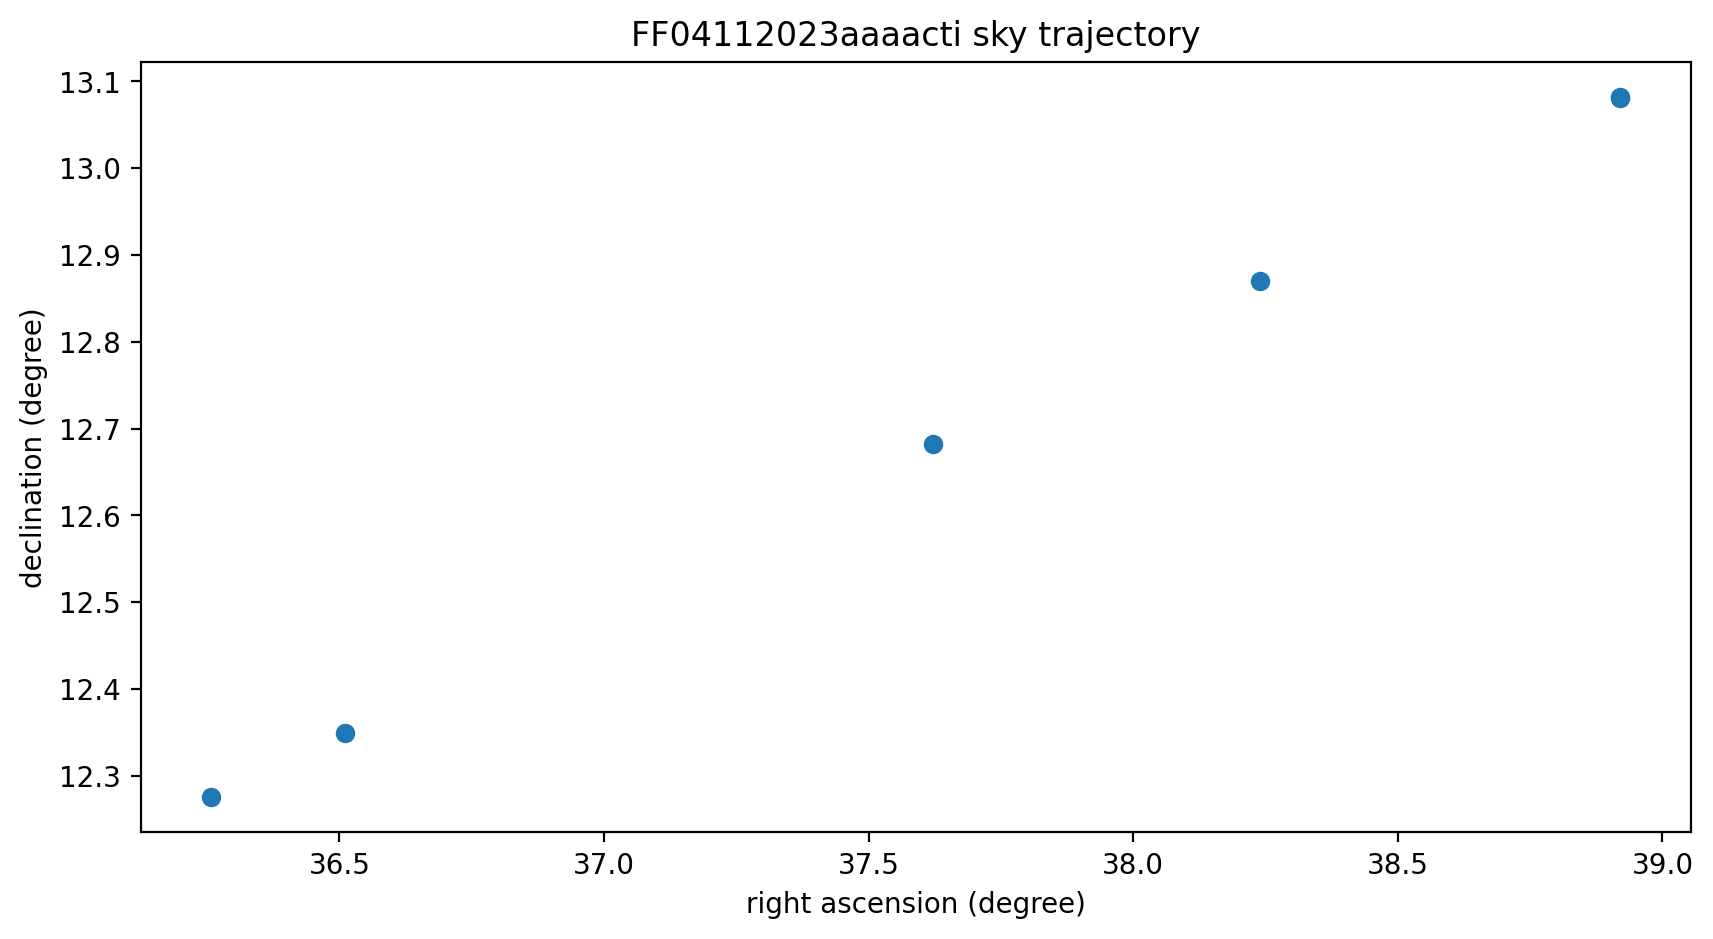

In [5]:
sso_utils.plot_traj(pdf_lc, ff_id)

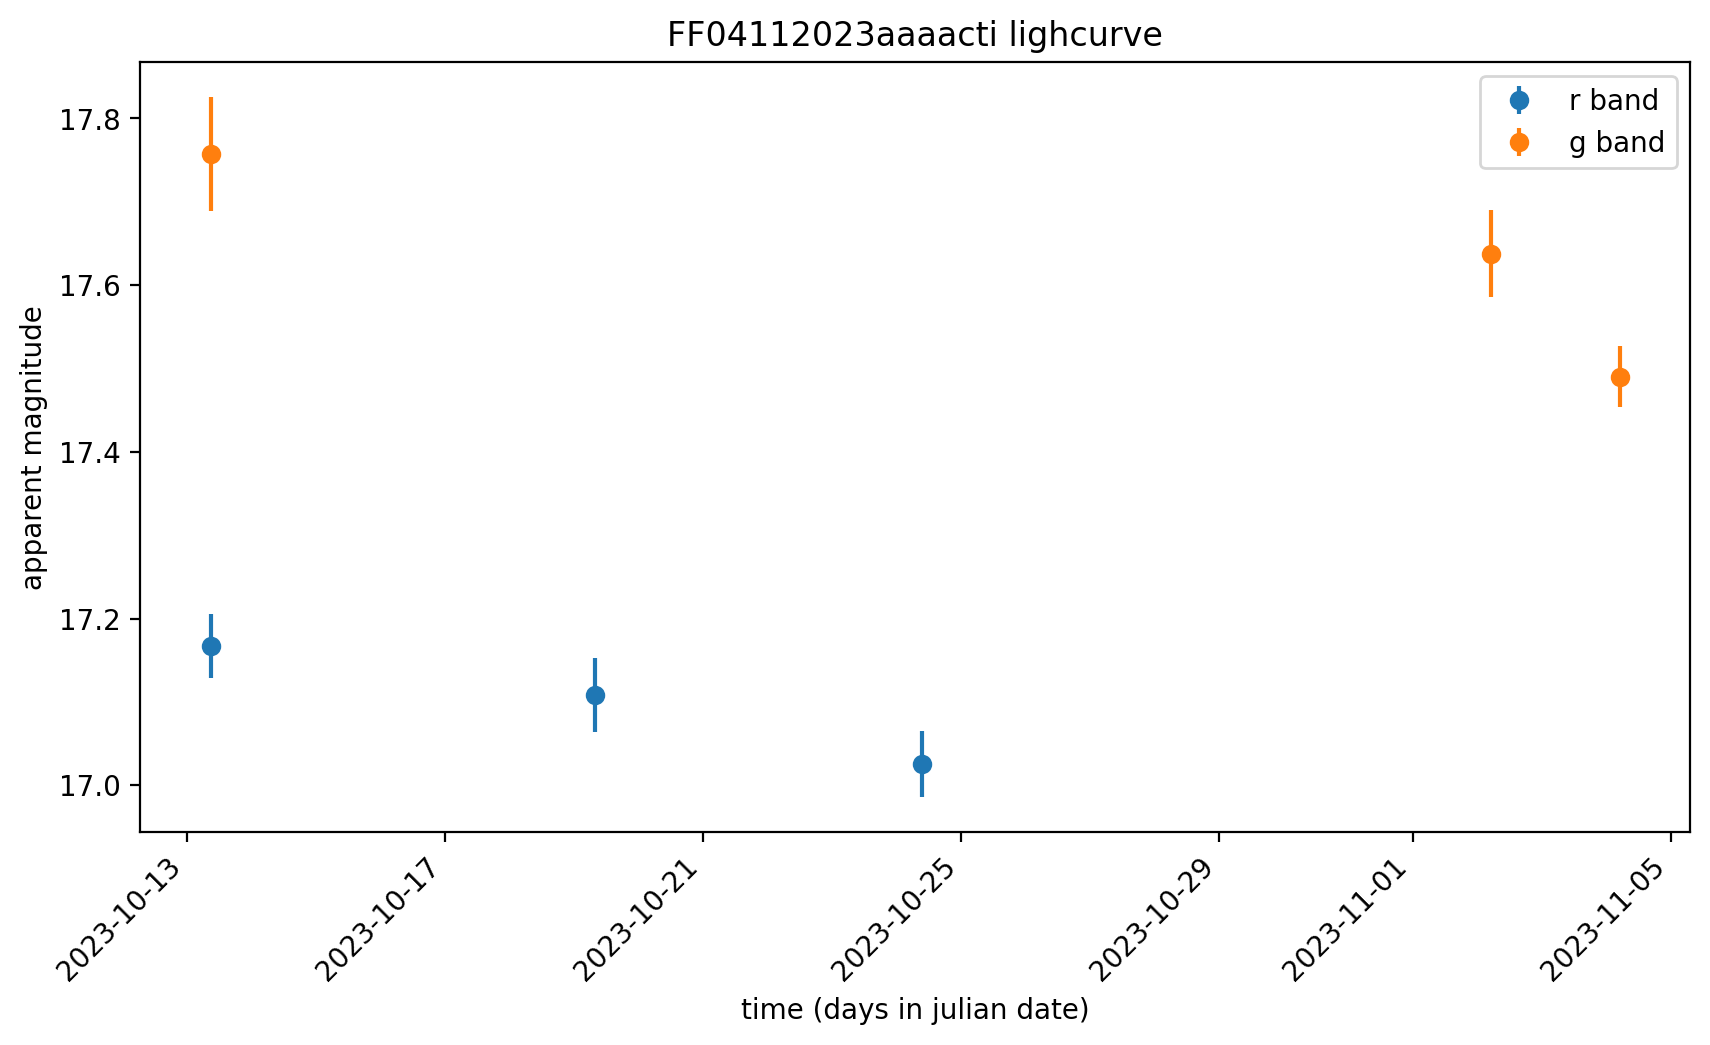

In [6]:
sso_utils.plot_lc(pdf_lc, ff_id)

## Ephemerides

#### get fink_fat orbital parameters

In [7]:
r_lc = requests.post(
  'https://fink-portal.org/api/v1/ssocand',
  json={
    'kind': "orbParams",
    'maxnumber': 15000
  }
)
# Format output in a DataFrame
pdf_orb = pd.read_json(io.BytesIO(r_lc.content)).sort_values(["d:ssoCandId", "d:ref_epoch"])
pdf_orb

,d:a,d:arg_peric,d:chi_reduced,d:e,d:i,d:long_node,d:mean_anomaly,d:ref_epoch,d:rms_a,d:rms_arg_peric,d:rms_e,d:rms_i,d:rms_long_node,d:rms_mean_anomaly,d:ssoCandId
0,8.876244,265.001565,0.950000,0.559389,1.934036,91.325922,10.610958,2.460253e+06,1.040960,3.896930,0.072021,0.068450,2.020710,2.270480,FF04112023aaaacti
1,13.516634,112.315698,-1.000000,0.646187,10.007624,207.986038,7.123208,2.460197e+06,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,FF09092023aaaactc
2,9.124433,0.373788,1.048333,0.432497,1.909824,94.671843,289.718610,2.460234e+06,20.039200,186.510000,1.582930,0.206581,9.459010,440.092000,FF16102023aaaactf
3,34.872544,98.709332,-1.000000,0.949610,7.475873,50.101567,357.832291,2.460208e+06,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,FF20092023aaaactd
4,2.605905,156.855048,2.571429,0.348782,10.946437,44.521540,3.395080,2.460058e+06,0.041450,0.835243,0.005279,0.224460,0.198487,0.357818,FF2023aaaaaaa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1850,3.257885,56.855087,32.768333,0.274122,15.440399,273.196304,19.241595,2.460169e+06,0.479430,2.305320,0.096842,0.122836,2.341170,5.275650,FF2023aaaacta
1851,9.875010,151.579272,-1.000000,0.903645,0.744524,178.668622,1.571952,2.460239e+06,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,FF21102023aaaactg
1852,4.664265,141.585135,1.180000,0.406247,1.049503,36.352962,256.853280,2.460242e+06,0.905759,14.415000,0.941299,1.031960,0.972960,131.694000,FF24102023aaaacth
1853,4.820129,115.820384,0.848750,0.244321,1.137556,35.690486,269.970155,2.460214e+06,0.239134,8.058060,0.224767,0.140292,0.056368,36.014600,FF26092023aaaacte


### Using Miriade

In [8]:
sso_utils.ephemeries(pdf_orb.iloc[:3], "2023-11-23", "2023-11-24", 1/24, method="miriade")

,Date,LAST,RA,DEC,HA,Az,H,Dobs,Dhelio,VMag,Phase,Elong.,AM,dRAcosDEC,dDEC,RV,targetname
0,2.460272e+06,20:19:24.14,34.114594,11.673609,18.049067,80.601457,6.993902,3.446958,4.365614,6.412636,5.357527,155.623844,7.744183,-0.235204,-0.060692,15.522453,FF04112023aaaacti
1,2.460272e+06,21:19:34.03,34.110572,11.672598,19.052081,88.629968,19.494100,3.447332,4.365729,6.413506,5.366858,155.578067,2.972007,-0.237373,-0.060668,15.555700,FF04112023aaaacti
2,2.460272e+06,22:19:43.83,34.106515,11.671586,20.055074,97.248761,32.032613,3.447707,4.365844,6.414378,5.376220,155.532127,1.880270,-0.239371,-0.060770,15.614104,FF04112023aaaacti
3,2.460272e+06,23:19:53.71,34.102426,11.670571,21.058092,107.695690,44.295864,3.448083,4.365959,6.415252,5.385613,155.486019,1.430315,-0.241042,-0.060984,15.694999,FF04112023aaaacti
4,2.460272e+06,00:20:03.60,34.098312,11.669552,22.061112,122.361524,55.697501,3.448462,4.366074,6.416129,5.395029,155.439755,1.209943,-0.242255,-0.061289,15.794171,FF04112023aaaacti
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19,2.460272e+06,15:22:31.44,332.818811,-13.004502,17.187480,94.493667,-17.190378,9.336204,9.375127,10.277571,6.045430,89.233216,-999.000000,0.072396,0.033230,24.778462,FF16102023aaaactf
20,2.460272e+06,16:22:41.24,332.820043,-13.003948,18.190120,102.436111,-4.774693,9.336800,9.375028,10.277684,6.045384,89.192981,-999.000000,0.071669,0.033278,24.769451,FF16102023aaaactf
21,2.460272e+06,17:22:51.13,332.821262,-13.003393,19.192784,110.816860,7.256086,9.337396,9.374930,10.277798,6.045349,89.152730,7.493289,0.070952,0.033379,24.786375,FF16102023aaaactf
22,2.460272e+06,18:23:01.01,332.822470,-13.002835,20.195450,120.368382,18.585418,9.337993,9.374831,10.277912,6.045323,89.112429,3.109122,0.070306,0.033529,24.828050,FF16102023aaaactf


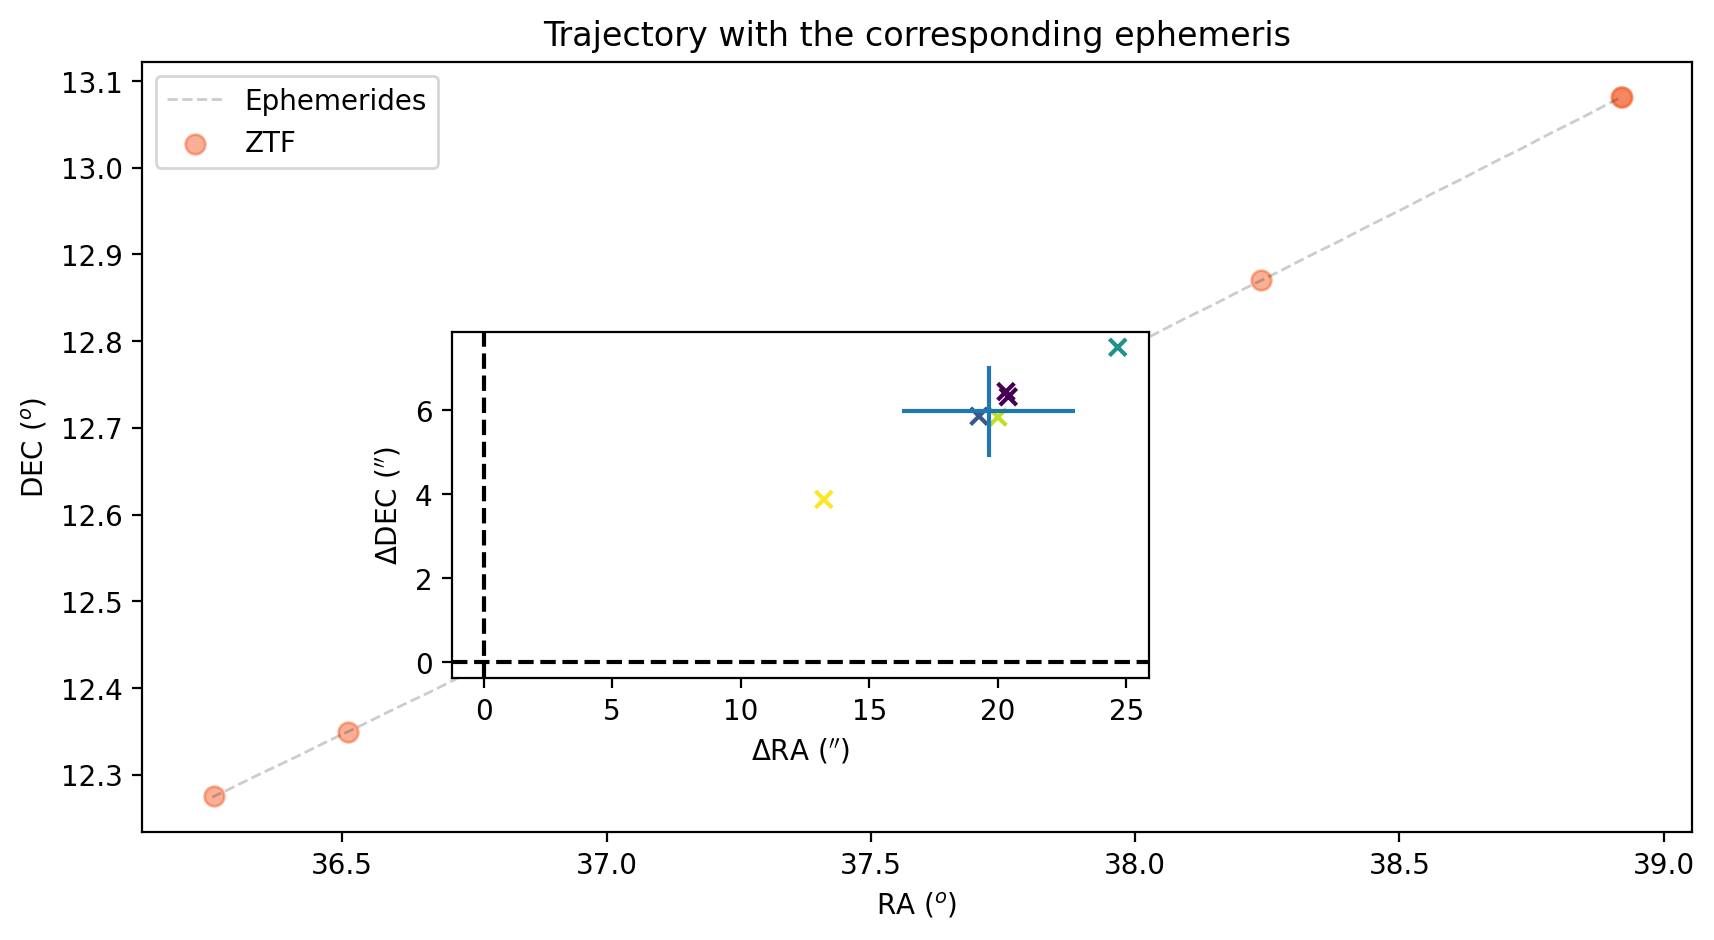

In [9]:
sso_utils.plot_perf_ephem(pdf_orb, pdf_lc, ff_id, method="miriade")

### Using Sbpy

In [21]:
from astropy.time import Time
sso_utils.ephemeries(pdf_orb.iloc[:3], "2023-11-23", "2023-11-24", 1/24/60, method="sbpy")

,targetname,RA,DEC,RA*cos(Dec)_rate,DEC_rate,alpha,elong,r,Delta,V,trueanom,epoch,Date
0,FF04112023aaaacti,34.114468,11.673573,-0.094079,-0.024277,5.357554,155.622346,4.365612,3.446956,20.790652,44.787547,2023-11-23 00:01:09.183999742,2.460272e+06
1,FF04112023aaaacti,34.114401,11.673556,-0.094094,-0.024276,5.357710,155.621580,4.365614,3.446963,20.790665,44.787636,2023-11-23 00:02:09.183996166,2.460272e+06
2,FF04112023aaaacti,34.114335,11.673539,-0.094108,-0.024276,5.357865,155.620814,4.365616,3.446969,20.790679,44.787725,2023-11-23 00:03:09.183992590,2.460272e+06
3,FF04112023aaaacti,34.114268,11.673522,-0.094123,-0.024275,5.358020,155.620049,4.365618,3.446975,20.790692,44.787813,2023-11-23 00:04:09.183989014,2.460272e+06
4,FF04112023aaaacti,34.114201,11.673506,-0.094138,-0.024274,5.358175,155.619283,4.365620,3.446981,20.790705,44.787902,2023-11-23 00:05:09.183985437,2.460272e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4318,FF16102023aaaactf,332.824760,-13.001760,0.027785,0.013575,6.045294,89.032759,9.374643,9.339153,24.650168,241.149926,2023-11-23 23:57:09.178864206,2.460272e+06
4319,FF16102023aaaactf,332.824780,-13.001751,0.027783,0.013576,6.045294,89.032080,9.374641,9.339163,24.650169,241.149948,2023-11-23 23:58:09.178860630,2.460272e+06
4320,FF16102023aaaactf,332.824800,-13.001742,0.027781,0.013578,6.045293,89.031400,9.374640,9.339173,24.650171,241.149969,2023-11-23 23:59:09.178857054,2.460272e+06
4321,FF16102023aaaactf,332.824820,-13.001732,0.027780,0.013580,6.045293,89.030720,9.374638,9.339183,24.650173,241.149990,2023-11-24 00:00:09.178853477,2.460273e+06


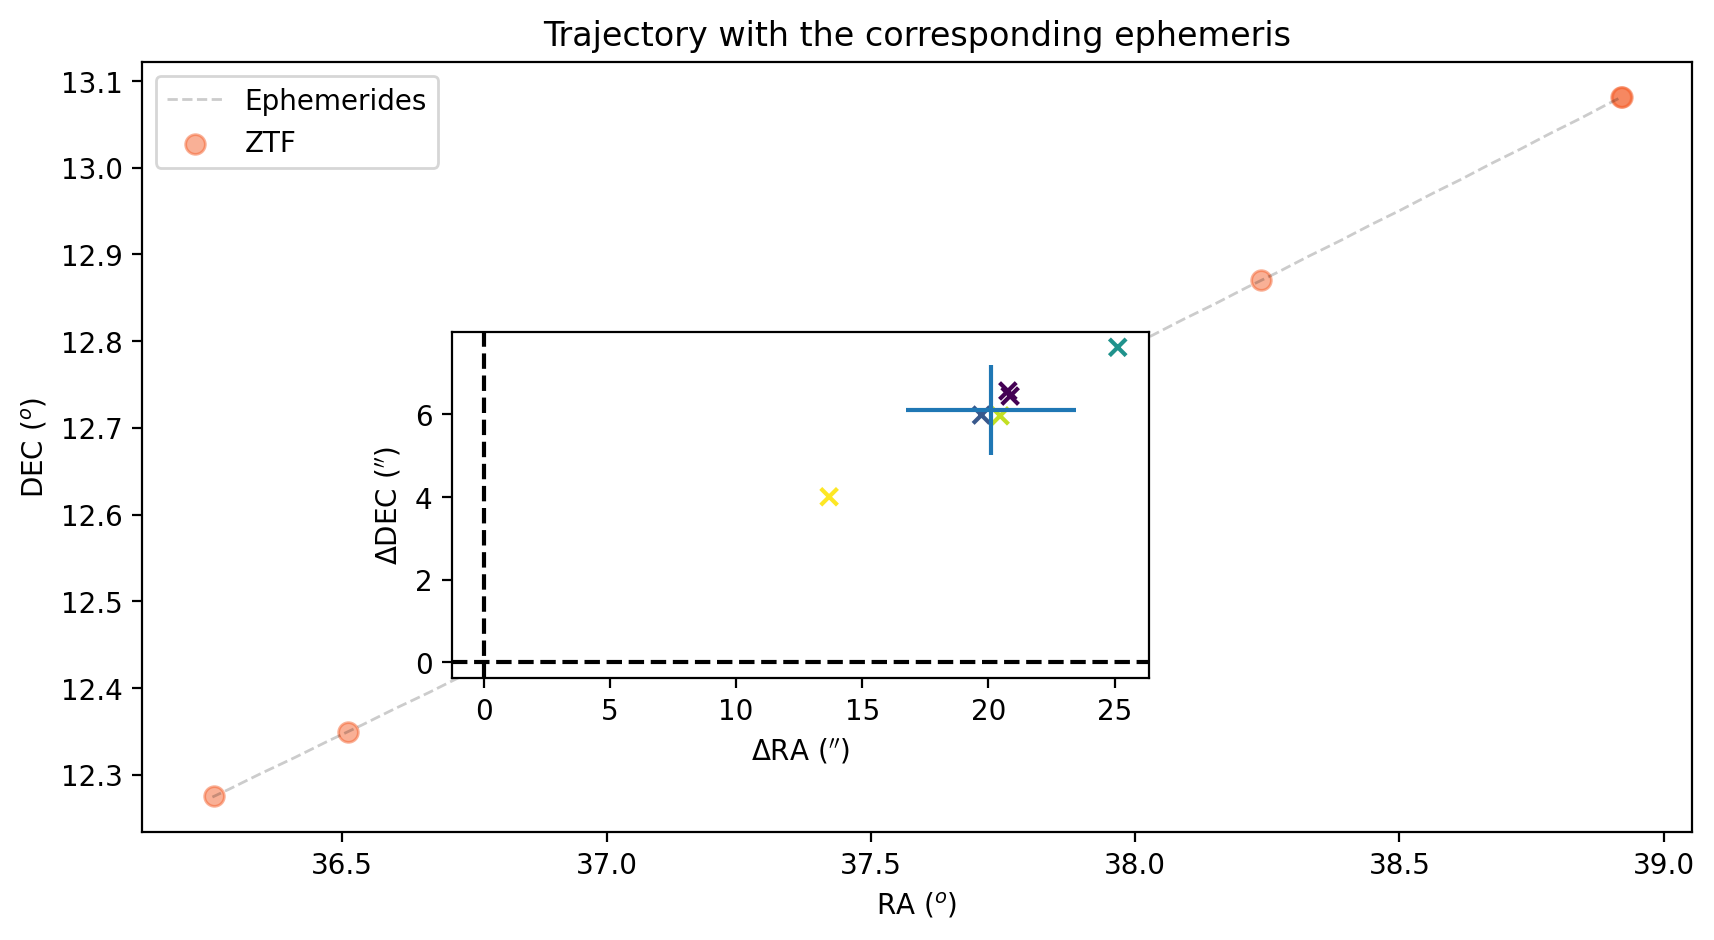

In [22]:
sso_utils.plot_perf_ephem(pdf_orb, pdf_lc, ff_id, method="sbpy")

## Improve asteroid orbits with new observations using Fink-FAT

In [12]:
from fink_fat.orbit_fitting.orbfit_local import compute_df_orbit_param

In [25]:
compute_df_orbit_param?

In [14]:
traj_pdf = sso_utils.prep_traj_for_orbfit(pdf_lc[pdf_lc["d:ssoCandId"] == ff_id])
traj_pdf

,d:assoc_tag,d:candid,dec,fid,jd,dcmag,d:nid,d:objectId,ra,d:sigmapsf,d:ssoCandId,trajectory_id
11998,I,2476372023315015024,13.081433,2,2.460231e+06,17.167105,2476,ZTF23abjovyv,38.919989,0.038061,FF04112023aaaacti,0
12000,I,2476378843315015021,13.081166,1,2.460231e+06,17.757242,2476,ZTF23abjphna,38.919244,0.067864,FF04112023aaaacti,0
12008,A,2482327453615015018,12.870181,2,2.460237e+06,17.108437,2482,ZTF23ablrlxa,38.238813,0.044484,FF04112023aaaacti,0
12014,A,2487400923815015000,12.682060,2,2.460242e+06,17.025036,2487,ZTF23abnbdkc,37.621703,0.039644,FF04112023aaaacti,0
12016,A,2496209324315015004,12.349785,1,2.460251e+06,17.637896,2496,ZTF23abofdlw,36.511430,0.052509,FF04112023aaaacti,0
12017,A,2498212124315015012,12.275076,1,2.460253e+06,17.490282,2498,ZTF23aboqkyq,36.257381,0.036812,FF04112023aaaacti,0


#### add some fake new observation points

In [28]:

ephem_new_point = sso_utils.ephemeries(
    pdf_orb[pdf_orb["d:ssoCandId"] == ff_id],
    "2023-11-25",
    "2023-11-30",
    1
)
ephem_new_point[["RA", "DEC", "Date"]]

,RA,DEC,Date
0,33.927542,11.625409,2460273.5
1,33.837904,11.602753,2460274.5
2,33.750948,11.581088,2460275.5
3,33.666737,11.560434,2460276.5
4,33.585334,11.540812,2460277.5


In [29]:
traj_extended = sso_utils.add_fake_point_to_traj(traj_pdf, ephem_new_point)
traj_extended

,d:assoc_tag,d:candid,dec,fid,jd,dcmag,d:nid,d:objectId,ra,d:sigmapsf,d:ssoCandId,trajectory_id
11998,I,2.476372e+18,13.081433,2,2.460231e+06,17.167105,2476.0,ZTF23abjovyv,38.919989,0.038061,FF04112023aaaacti,0
12000,I,2.476379e+18,13.081166,1,2.460231e+06,17.757242,2476.0,ZTF23abjphna,38.919244,0.067864,FF04112023aaaacti,0
12008,A,2.482327e+18,12.870181,2,2.460237e+06,17.108437,2482.0,ZTF23ablrlxa,38.238813,0.044484,FF04112023aaaacti,0
12014,A,2.487401e+18,12.682060,2,2.460242e+06,17.025036,2487.0,ZTF23abnbdkc,37.621703,0.039644,FF04112023aaaacti,0
12016,A,2.496209e+18,12.349785,1,2.460251e+06,17.637896,2496.0,ZTF23abofdlw,36.511430,0.052509,FF04112023aaaacti,0
12017,A,2.498212e+18,12.275076,1,2.460253e+06,17.490282,2498.0,ZTF23aboqkyq,36.257381,0.036812,FF04112023aaaacti,0
0,NaN,NaN,11.625409,1,2.460274e+06,17.000000,NaN,NaN,33.927542,NaN,FF04112023aaaacti,0
1,NaN,NaN,11.602753,1,2.460274e+06,17.000000,NaN,NaN,33.837904,NaN,FF04112023aaaacti,0
2,NaN,NaN,11.581088,1,2.460276e+06,17.000000,NaN,NaN,33.750948,NaN,FF04112023aaaacti,0
3,NaN,NaN,11.560434,1,2.460276e+06,17.000000,NaN,NaN,33.666737,NaN,FF04112023aaaacti,0


In [30]:
orb = compute_df_orbit_param(traj_extended, 1, "tmp_orbfit")
orb

,trajectory_id,provisional designation,ref_epoch,a,e,i,long. node,arg. peric,mean anomaly,rms_a,rms_e,rms_i,rms_long. node,rms_arg. peric,rms_mean anomaly,chi_reduced
0,0,K23T00A,2.460251e+06,8.871988,0.559112,1.933934,91.331414,265.003561,10.543021,0.024903,0.001763,0.005425,0.161627,0.381122,0.128707,0.586364


In [18]:
pdf_orb[pdf_orb["d:ssoCandId"] == ff_id]

,d:a,d:arg_peric,d:chi_reduced,d:e,d:i,d:long_node,d:mean_anomaly,d:ref_epoch,d:rms_a,d:rms_arg_peric,d:rms_e,d:rms_i,d:rms_long_node,d:rms_mean_anomaly,d:ssoCandId
0,8.876244,265.001565,0.95,0.559389,1.934036,91.325922,10.610958,2.460253e+06,1.04096,3.89693,0.072021,0.06845,2.02071,2.27048,FF04112023aaaacti


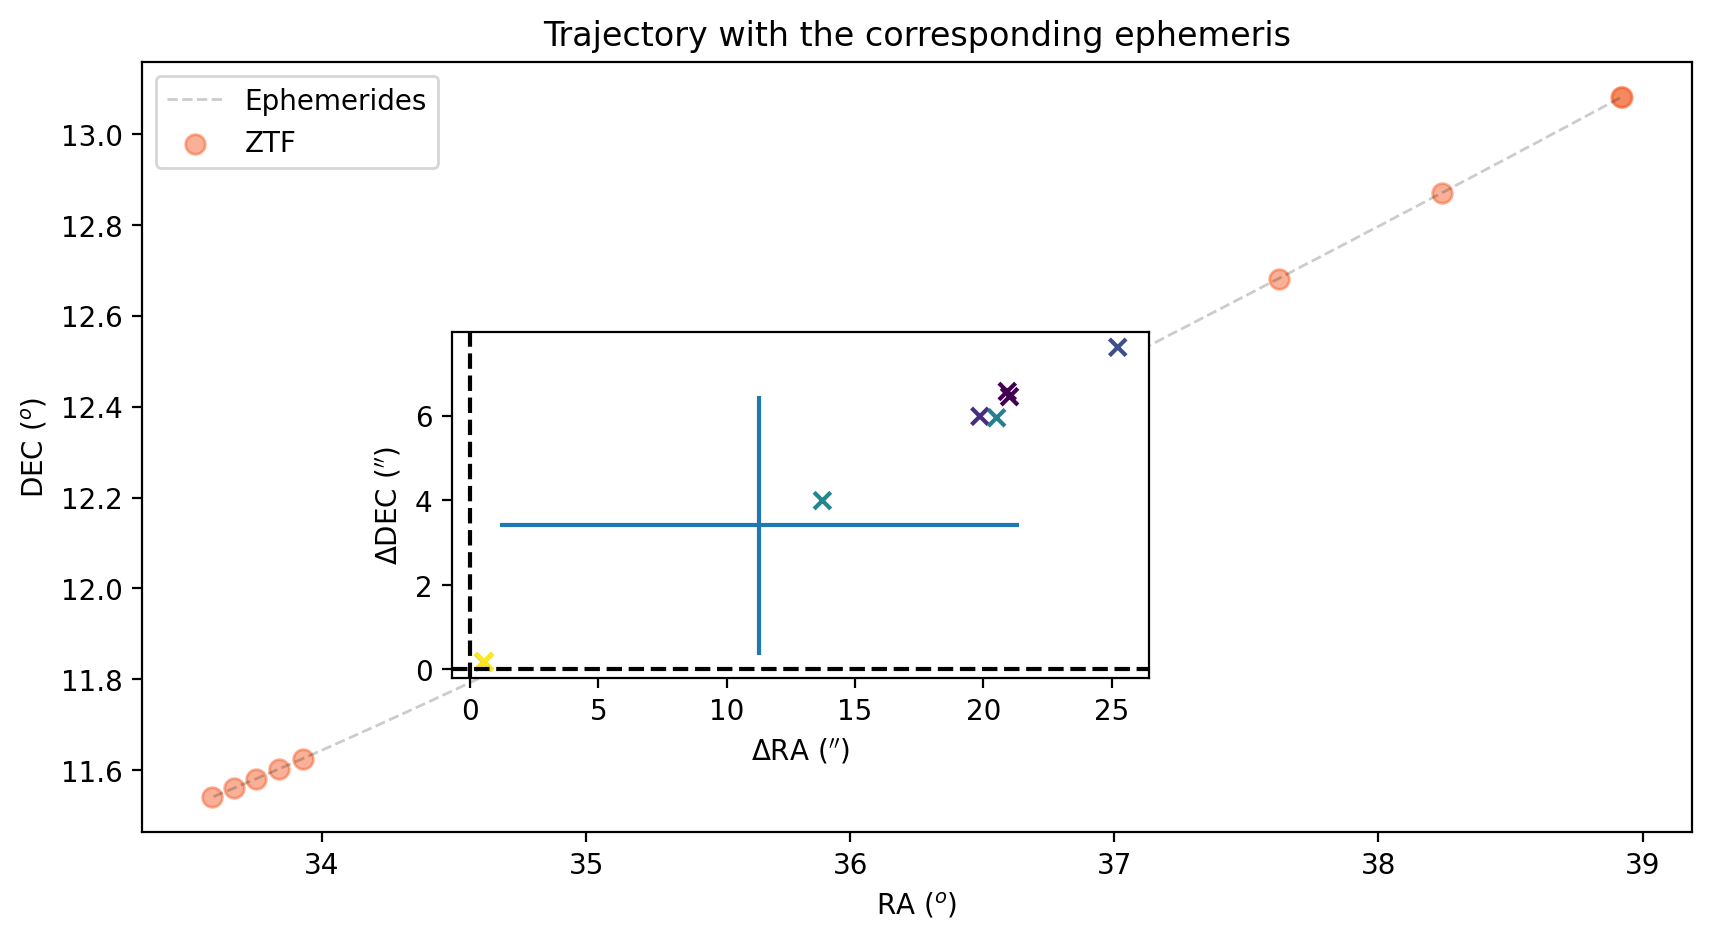

In [19]:
sso_utils.plot_perf_ephem(sso_utils.format_orbit(orb, ff_id), traj_extended.rename({
    "ra": "d:ra", "dec": "d:dec", "jd": "d:jd"
}, axis=1), ff_id, method="sbpy")